In [1]:
# Complexity: O(V + E)
def BFS(adj, start):
    visited = set()
    queue = [start]
    while queue:
        node = queue.pop(0) # dequeue is better
        print("Visiting", node)
        visited.add(node)
        queue.extend(adj[node] - visited)

BFS({ 0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: set(), 4: set(), 5: set(), 6: set() }, 0)

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Visiting 5
Visiting 6


la compléxité est difficile à trouver ici, 

- le popleft on enlève le premier element pour n'est pas visiter après.

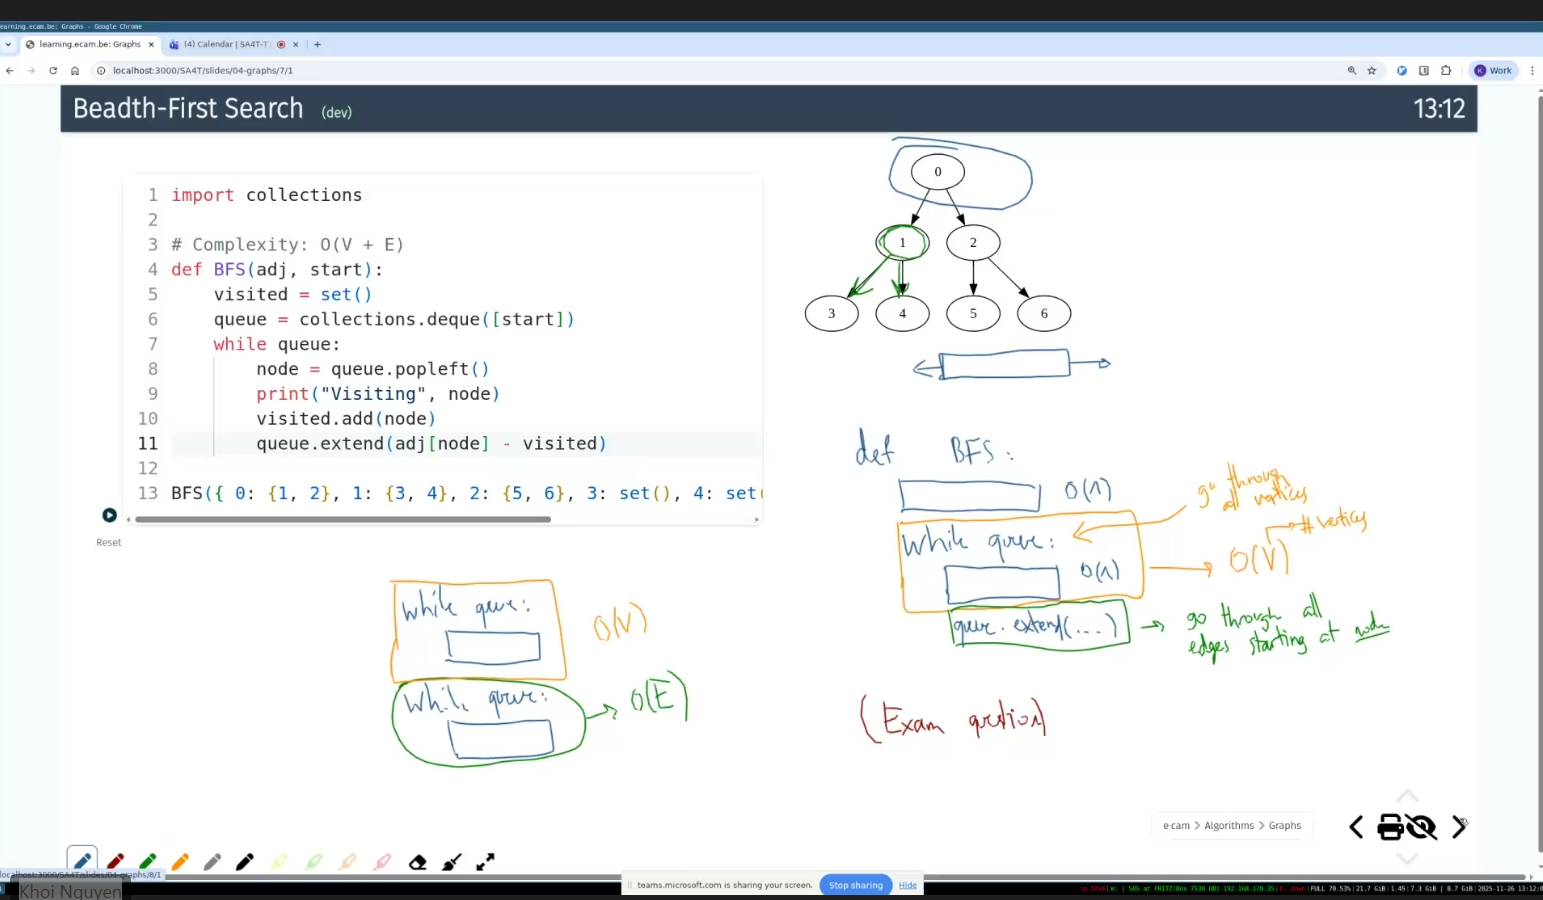

# Depth-First Search

In [8]:
def DFS(adj: dict[any, set]):
    visited = set()

    def explore(start):
        print("Visiting", start)
        visited.add(start)
        for neighbour in adj[start] - visited:
            explore(neighbour)
        print("Finish exploring", start)

    #explore(0)

    for node in adj:
        if node in visited:
            explore(node)

DFS({ 0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: set(), 4: set(), 5: set(), 6: set() })

# exercise 1


In [9]:
# Complexity: O(V + E)
def BFS(adj, start):
    visited = set()
    queue = [start]
    while queue:
        node = queue.pop(0) # dequeue is better
        print("Visiting", node)
        visited.add(node)
        queue.extend(adj[node] - visited)

BFS({ 0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: set(), 4: set(), 5: set(), 6: set() }, 0)

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Visiting 5
Visiting 6


In [20]:
import colle

def shortest_paths(adj, start):

    dist = { start: 0 }

    queue = collections.deque([start])

    while queue:

        node = queue.popleft()

        print("Visiting", node)

        for neighbour in adj[node] - set(dist.keys()):

            if neighbour not in dist:

                dist[neighbour] = dist[node] + 1

                queue.append(neighbour)

    print(dist)
 
shortest_paths({ 0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: set(), 4: set(), 5: set(), 6: set() }, 0)
 

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Visiting 5
Visiting 6
{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2}


In [21]:
import collections

def shortest_paths(adj, start):

    dist = { start: 0 }

    queue = collections.deque([start])

    while queue:

        node = queue.popleft()

        print("Visiting", node)

        for neighbour in adj[node] - set(dist.keys()):

            if neighbour not in dist:

                dist[neighbour] = dist[node] + 1

                queue.append(neighbour)

    print(dist)
 
shortest_paths({ 0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: set(), 4: set(), 5: set(), 6: set() }, 0)
 

Visiting 0
Visiting 1
Visiting 2
Visiting 3
Visiting 4
Visiting 5
Visiting 6
{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 2}


# sudoku

In [22]:
from typing import List, Optional, Set

def row_indices(n: int) -> List[int]:
    r = n // 9
    return [r * 9 + i for i in range(9)]

def col_indices(n: int) -> List[int]:
    c = n % 9
    return [c + 9 * i for i in range(9)]

def block_indices(n: int) -> List[int]:
    r = (n // 9) // 3 * 3
    c = (n % 9) // 3 * 3
    return [ (r + dr) * 9 + (c + dc) for dr in range(3) for dc in range(3) ]

def blacklist(grid: List[int], n: int) -> Set[int]:
    """Return set of values not allowed at position n (1..9) based on row/col/block."""
    used = set()
    for i in row_indices(n) + col_indices(n) + block_indices(n):
        v = grid[i]
        if v != 0:
            used.add(v)
    return used

def candidates(grid: List[int], n: int) -> Set[int]:
    return set(range(1,10)) - blacklist(grid, n)

def find_empty_positions(grid: List[int]) -> List[int]:
    return [i for i, v in enumerate(grid) if v == 0]

def solve(grid: List[int]) -> Optional[List[int]]:
    """Solve the Sudoku grid (list of 81 ints, 0 = empty). Returns solved grid or None."""
    empties = find_empty_positions(grid)
    if not empties:
        return grid

    # heuristic: choose empty with fewest candidates
    best = None
    best_cands: Set[int] = set()
    for pos in empties:
        cands = candidates(grid, pos)
        if not cands:
            return None
        if best is None or len(cands) < len(best_cands):
            best = pos
            best_cands = cands
            if len(best_cands) == 1:
                break

    assert best is not None
    for val in sorted(best_cands):
        grid_copy = grid.copy()
        grid_copy[best] = val
        solved = solve(grid_copy)
        if solved is not None:
            return solved
    return None

# Example puzzle (0 = empty) - classic example
example = [
5,3,0,0,7,0,0,0,0,
6,0,0,1,9,5,0,0,0,
0,9,8,0,0,0,0,6,0,
8,0,0,0,6,0,0,0,3,
4,0,0,8,0,3,0,0,1,
7,0,0,0,2,0,0,0,6,
0,6,0,0,0,0,2,8,0,
0,0,0,4,1,9,0,0,5,
0,0,0,0,8,0,0,7,9
]

sol = solve(example)
print("Solved:")
if sol is None:
    print("No solution")
else:
    for r in range(9):
        row = sol[r*9:(r+1)*9]
        print(row)


Solved:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


In [34]:
def blacklist(grid: list[int], n:int) -> set[int]:
    i, j = divmod(n, 9)
    # values in the row
    row = set(grid[9*i + k] for k in range(9))
    # values in the column
    col = set(grid[9*k + j] for k in range(9))
    # values in the 3x3 region
    x = (i // 3) * 3
    y = (j // 3) * 3
    region = set(grid[(x + dx) * 9 + (y + dy)] for dx in range(3) for dy in range(3))
    return (row | col | region) - {0}

def solve(grid: list[int]):
    # find first empty cell (0)
    if 0 not in grid: return grid
    n = grid.index(0)

    # try all candidates 1..9
    for i in range(1, 10):
        if i not in blacklist(grid, n):
            grid[n] = i
            # recursive call
            solved = solve(grid)
            if 0 not in solved:
                return solved
            # backtrack
            grid[n] = 0
    return grid


solve(81*[0])

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 4,
 5,
 6,
 7,
 8,
 9,
 1,
 2,
 3,
 7,
 8,
 9,
 1,
 2,
 3,
 4,
 5,
 6,
 2,
 1,
 4,
 3,
 6,
 5,
 8,
 9,
 7,
 3,
 6,
 5,
 8,
 9,
 7,
 2,
 1,
 4,
 8,
 9,
 7,
 2,
 1,
 4,
 3,
 6,
 5,
 5,
 3,
 1,
 6,
 4,
 2,
 9,
 7,
 8,
 6,
 4,
 2,
 9,
 7,
 8,
 5,
 3,
 1,
 9,
 7,
 8,
 5,
 3,
 1,
 6,
 4,
 2]

In [35]:
def blacklist(grid: list[int], n: int) -> set[int]:

    i, j = n // 9, n % 9

    row = set(grid[9 * i + k] for k in range(9))

    col = set(grid[9 * k + j] for k in range(9))

    i, j = i // 3 * 3, j // 3 * 3

    region = set(grid[9 * (i + di) + (j + dj)] for di in range(3) for dj in range(3))

    return row | col | region - {0}
 
def solve(grid: list[int]):

    if 0 not in grid:

        return grid

    n = grid.index(0)

    for i in set(range(1, 10)) - blacklist(grid, n):

        grid[n] = i

        result = solve(grid)

        if 0 not in result:

            return result

        grid[n] = 0

    return grid
 
solve(81*[0])
 

[1,
 2,
 3,
 4,
 5,
 8,
 9,
 6,
 7,
 4,
 5,
 8,
 6,
 7,
 9,
 1,
 2,
 3,
 9,
 6,
 7,
 1,
 2,
 3,
 8,
 4,
 5,
 2,
 1,
 9,
 8,
 3,
 4,
 5,
 7,
 6,
 3,
 8,
 4,
 5,
 6,
 7,
 2,
 1,
 9,
 5,
 7,
 6,
 9,
 1,
 2,
 3,
 8,
 4,
 8,
 9,
 1,
 3,
 4,
 6,
 7,
 5,
 2,
 6,
 3,
 2,
 7,
 8,
 5,
 4,
 9,
 1,
 7,
 4,
 5,
 2,
 9,
 1,
 6,
 3,
 8]

# snakes and ladders

In [37]:
from collections import deque

snakes = {17: 13, 52: 29, 57: 40, 62: 22, 88: 18, 95: 51, 97: 79}
ladders = {3: 21, 8: 30, 28: 84, 58: 77, 75: 86, 80: 100, 90: 91}

def minimum_turns(snakes: dict[int,int], ladders: dict[int,int], start: int = 1, end: int = 100) -> int:
    """Return the minimum number of dice throws to reach `end` from `start`.
    We build the adjacency (possible moves after applying snakes/ladders) and run BFS."""
    # build mapping that applies jumps (ladders/snakes) if present
    jump = {}
    jump.update(snakes)
    jump.update(ladders)

    # build adjacency: from each square u, you can move to u+1..u+6 then apply jump if any
    adj = {i: set() for i in range(1, end + 1)}
    for u in range(1, end + 1):
        for dice in range(1, 7):
            v = u + dice
            if v > end:
                continue
            # apply jump if snake or ladder at v
            v = jump.get(v, v)
            adj[u].add(v)

    # BFS to find shortest number of throws (edges) from start to end
    dist = {start: 0}
    q = deque([start])
    while q:
        u = q.popleft()
        if u == end:
            return dist[u]
        for v in adj.get(u, ()):
            if v not in dist:
                dist[v] = dist[u] + 1
                q.append(v)
    return -1  # unreachable

# example: compute minimal turns for the given snakes and ladders
print('Minimum turns:', minimum_turns(snakes, ladders))

Minimum turns: 6


In [38]:
snakes = {17: 13, 52: 29, 57: 40, 62: 22, 88: 18, 95: 51, 97: 79}
ladders = {3: 21, 8: 30, 28: 84, 58: 77, 75: 86, 80: 100, 90: 91}
 
def minimum_turns(snakes, ladders):
    visited = set()
    board = { n: n for n in range(0, 101) }
    for start, end in (snakes | ladders).items():
        board[start] = end
    queue = [(0, 0)]
    while queue:
        square, turns = queue.pop(0)
        for move in range(square + 1, square + 7):
            move = board[move]
            if move >= 100:
                return turns + 1
            if move not in visited:
                visited.add(move)
                queue.append((move, turns + 1))
 
minimum_turns(snakes, ladders)

6

# Topological sort: implementation

In [ ]:
def topological_sort(adj: dict[any, set]) -> list:
    visited = set()

    def explore(start):
        visited.add(start)
        print("exploring", start)
        for node in adj[start] - visited:
            explore(node)
        print("finished exploring", start)


    for node in adj:
        if node not in visited:
            explore(node)
    
    return orderer

print(topological_sort({ 1: {2}, 0: {1}, 2: {3}, 3: set() }))

exploring 1
exploring 2
exploring 3
finished exploring 3
finished exploring 2
finished exploring 1
exploring 0
finished exploring 0
None
